<a href="https://colab.research.google.com/github/AlfanMarcel/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 1 :
Achmad Aly A/02/2141720039 <br>
Alfan Marcel M/08/2141720266 <br>
M Rifat Anwar/23/214172006

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Gamma Correction

 Gamma Correction pada citra
----------------------------
Masukkan nilai Gamma: 3


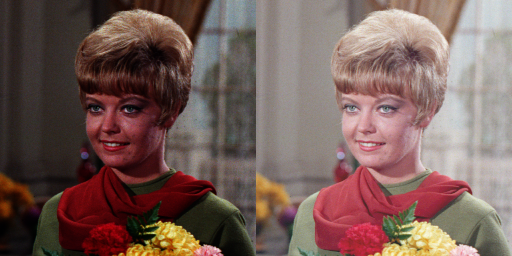

In [ ]:
print(' Gamma Correction pada citra')
print('----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Simulasi Image Depth

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


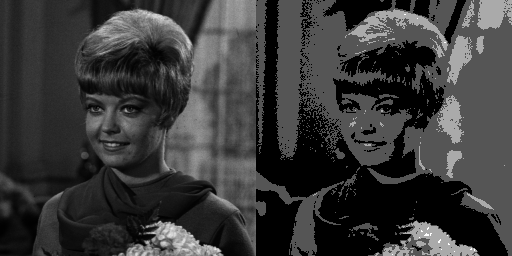

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

3. modul average denoising

Jumlah Citra di Average = 5, Nilai PSNR (dB): 27.535397017474253
Jumlah Citra di Average = 10, Nilai PSNR (dB): 27.5581201507784
Jumlah Citra di Average = 20, Nilai PSNR (dB): 27.51095261151212
Jumlah Citra di Average = 40, Nilai PSNR (dB): 27.459934988342436
Jumlah Citra di Average = 80, Nilai PSNR (dB): 27.41201259850078
Jumlah Citra di Average = 100, Nilai PSNR (dB): 27.370931279516654


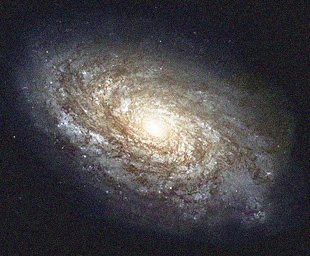

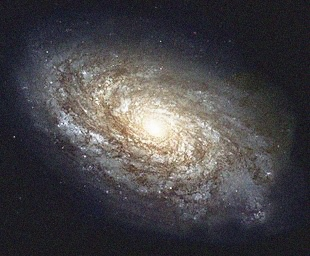

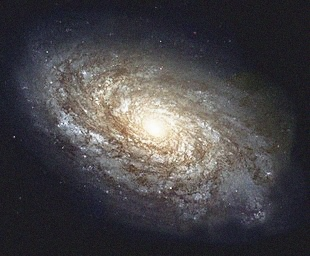

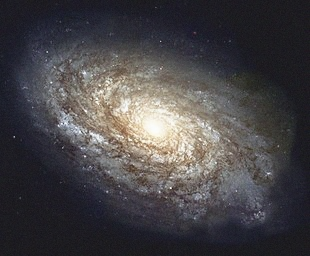

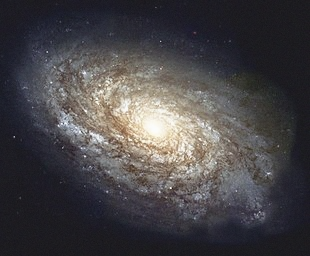

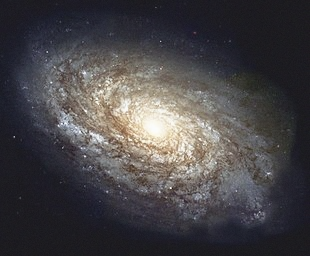

In [8]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob

# Membaca citra asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Inisialisasi array untuk menyimpan citra hasil penggabungan
combined_images = []

# Daftar jumlah citra yang akan di-average
jumlah_citra = [5, 10, 20, 40, 80, 100]

# Membaca citra-citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Proses penggabungan citra dengan Gaussian Noise ke citra asli untuk setiap jumlah citra
for n in jumlah_citra:
    # Mengambil n citra pertama
    noise_images_to_average = cv_img[:n]

    # Menghitung citra rata-rata dari n citra tersebut
    average_combined_image = np.mean(noise_images_to_average, axis=0).astype(np.uint8)

    # Menambahkan citra rata-rata ke dalam array
    combined_images.append(average_combined_image)

    # Hitung PSNR antara citra asli dan citra rata-rata hasil penggabungan
    mse = np.mean((original_image - average_combined_image) ** 2)
    if mse == 0:
        psnr = 100  # PSNR tak terbatas jika MSE adalah 0
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

    # Tampilkan atau cetak nilai PSNR
    print(f"Jumlah Citra di Average = {n}, Nilai PSNR (dB): {psnr}")

# Anda juga dapat menampilkan atau menyimpan citra hasil penggabungan untuk setiap jumlah citra
for i, image in enumerate(combined_images):
    cv2_imshow(image)

4. image masking

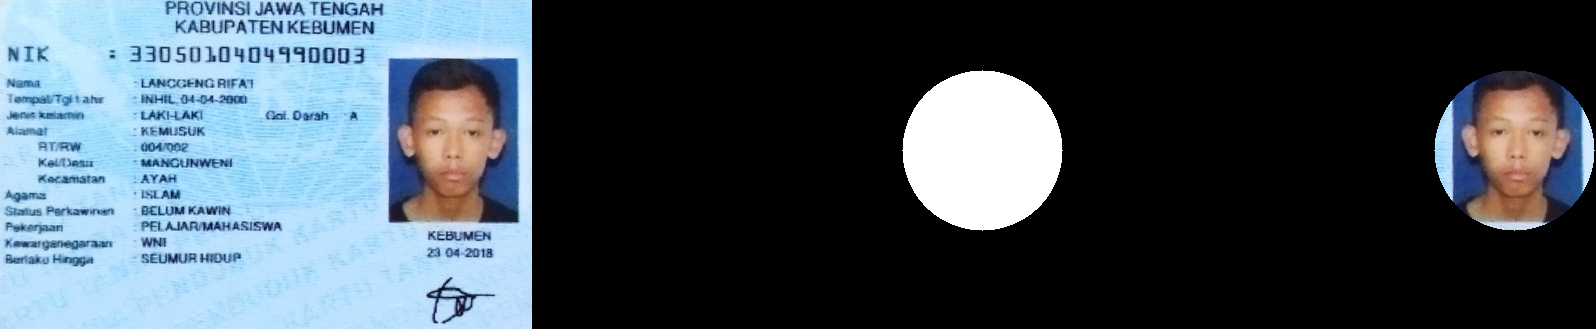

In [23]:
path='/content/drive/MyDrive/PCVK/Images/ktp.jpeg'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

center1 = (450, 150)
radius1 = 80

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(KTP, mask)

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. NOT

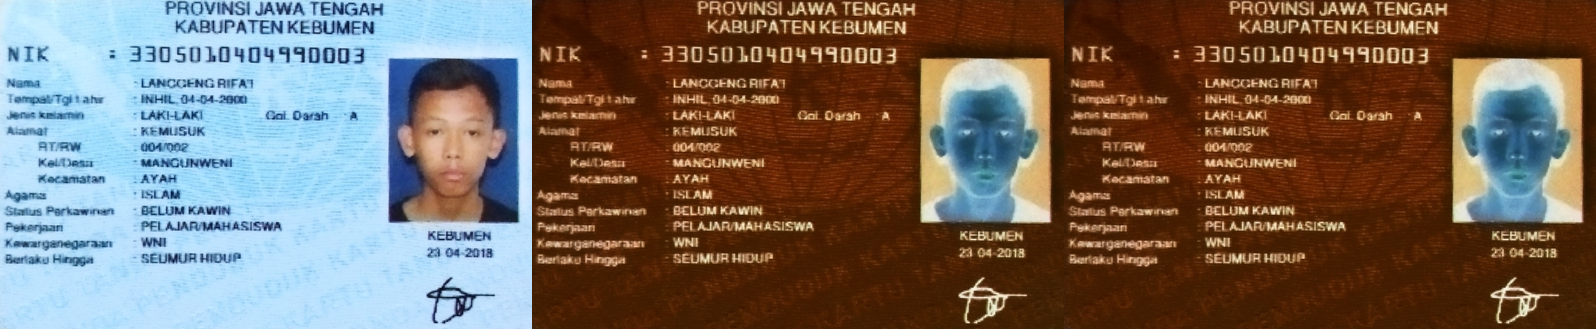

In [24]:
path='/content/drive/MyDrive/PCVK/Images/ktp.jpeg'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

center1 = (450, 150)
radius1 = 80

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_not(KTP, mask)

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

OR

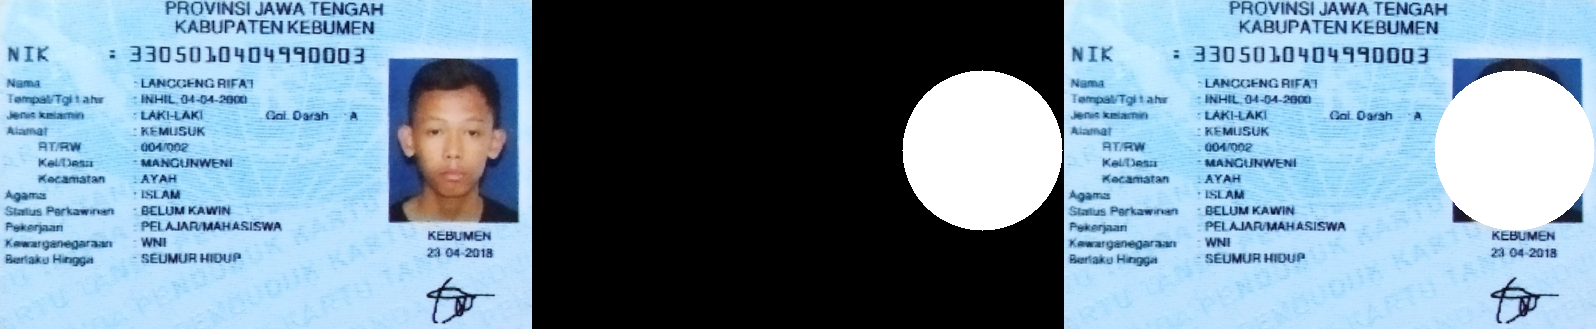

In [25]:
path='/content/drive/MyDrive/PCVK/Images/ktp.jpeg'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

center1 = (450, 150)
radius1 = 80

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_or(KTP, mask)

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

AND

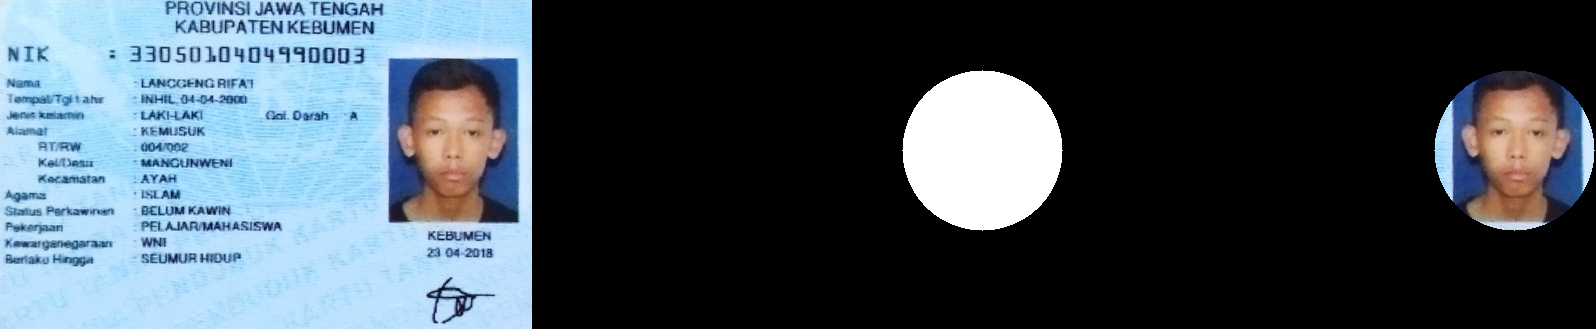

In [26]:
path='/content/drive/MyDrive/PCVK/Images/ktp.jpeg'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

center1 = (450, 150)
radius1 = 80

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(KTP, mask)

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

NAND

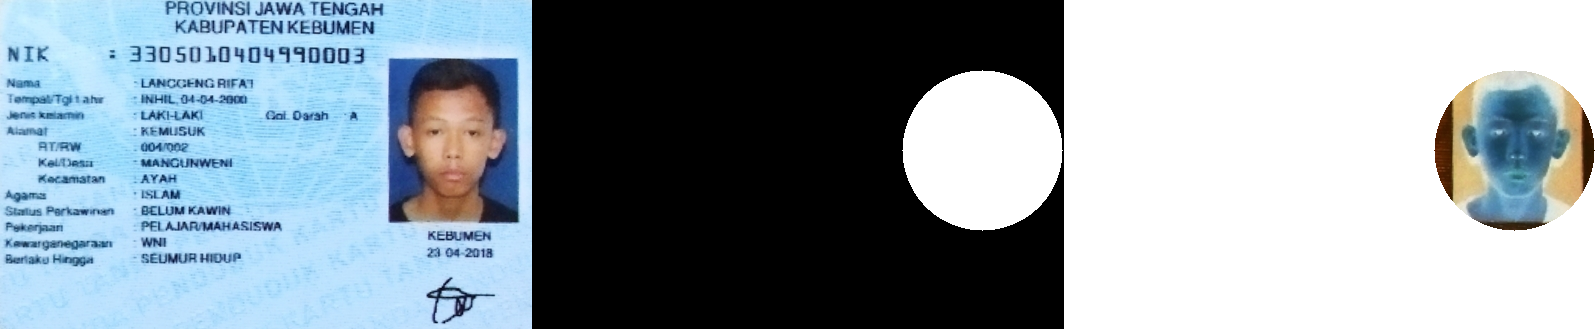

In [27]:
path='/content/drive/MyDrive/PCVK/Images/ktp.jpeg'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

center1 = (450, 150)
radius1 = 80

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_not(cv2.bitwise_and(KTP, mask))

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

Analisis

NOT = Membuat gambar menjadi inverse <br>
OR  = menggabungakan 2 pixel dari tiap gambar <br>
AND = menggabungkan 2 nilai yang sama dengan di area yang sama sama memiliki nilai warna pixel <br>
NAND = menggabungkan 2 nilai yang sama dengan di area yang sama sama memiliki nilai warna pixel kemudian melakukan inverse warna